In [2]:
# Install required modules if not already installed
%pip install pandas numpy matplotlib seaborn missingno openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [missingno]/3 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


Shape: (409517, 32)

Columns:
 Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

Data types:
 AREA             int64
AREA_TITLE      object
AREA_TYPE        int64
PRIM_STATE      object
NAICS           object
NAICS_TITLE     object
I_GROUP         object
OWN_CODE         int64
OCC_CODE        object
OCC_TITLE       object
O_GROUP         object
TOT_EMP         object
EMP_PRSE        object
JOBS_1000       object
LOC_QUOTIENT    object
PCT_TOTAL       object
PCT_RPT         object
H_MEAN          object
A_MEAN          object
MEAN_PRSE       object
H_PCT10         object
H_PCT25         object
H_MEDIAN   

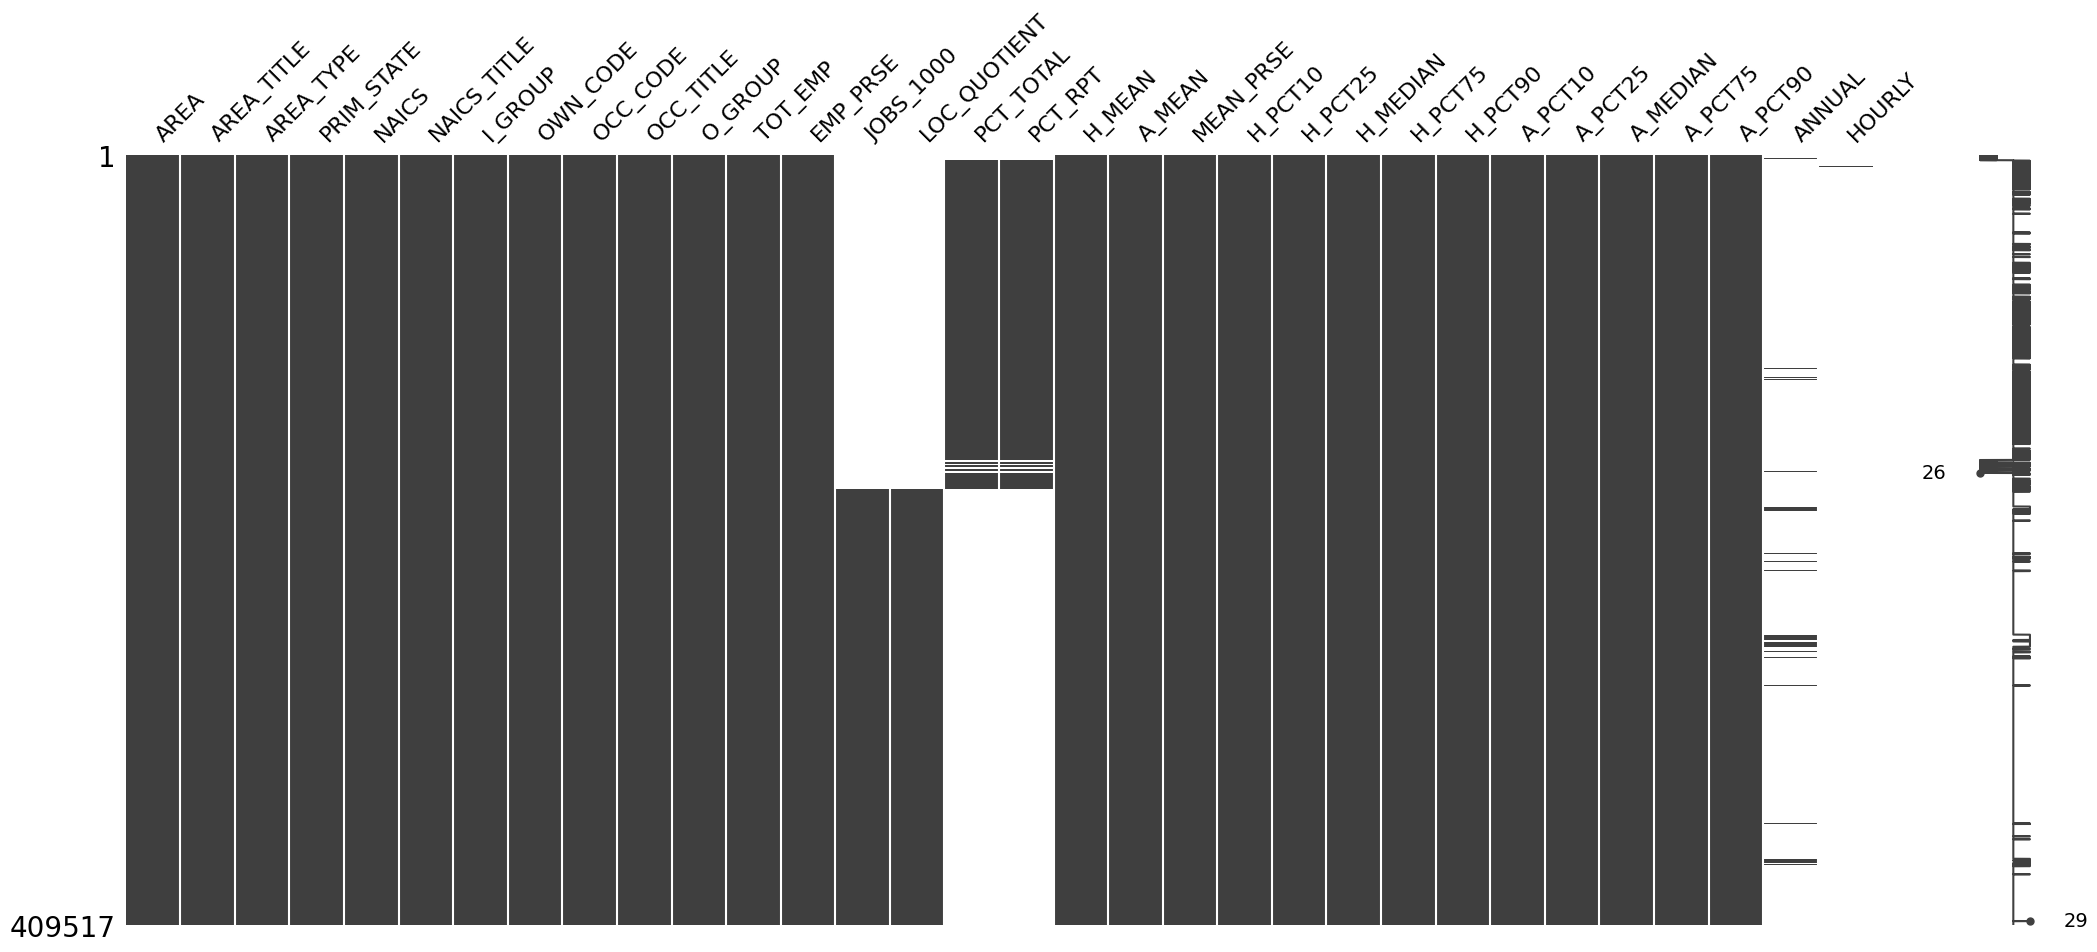

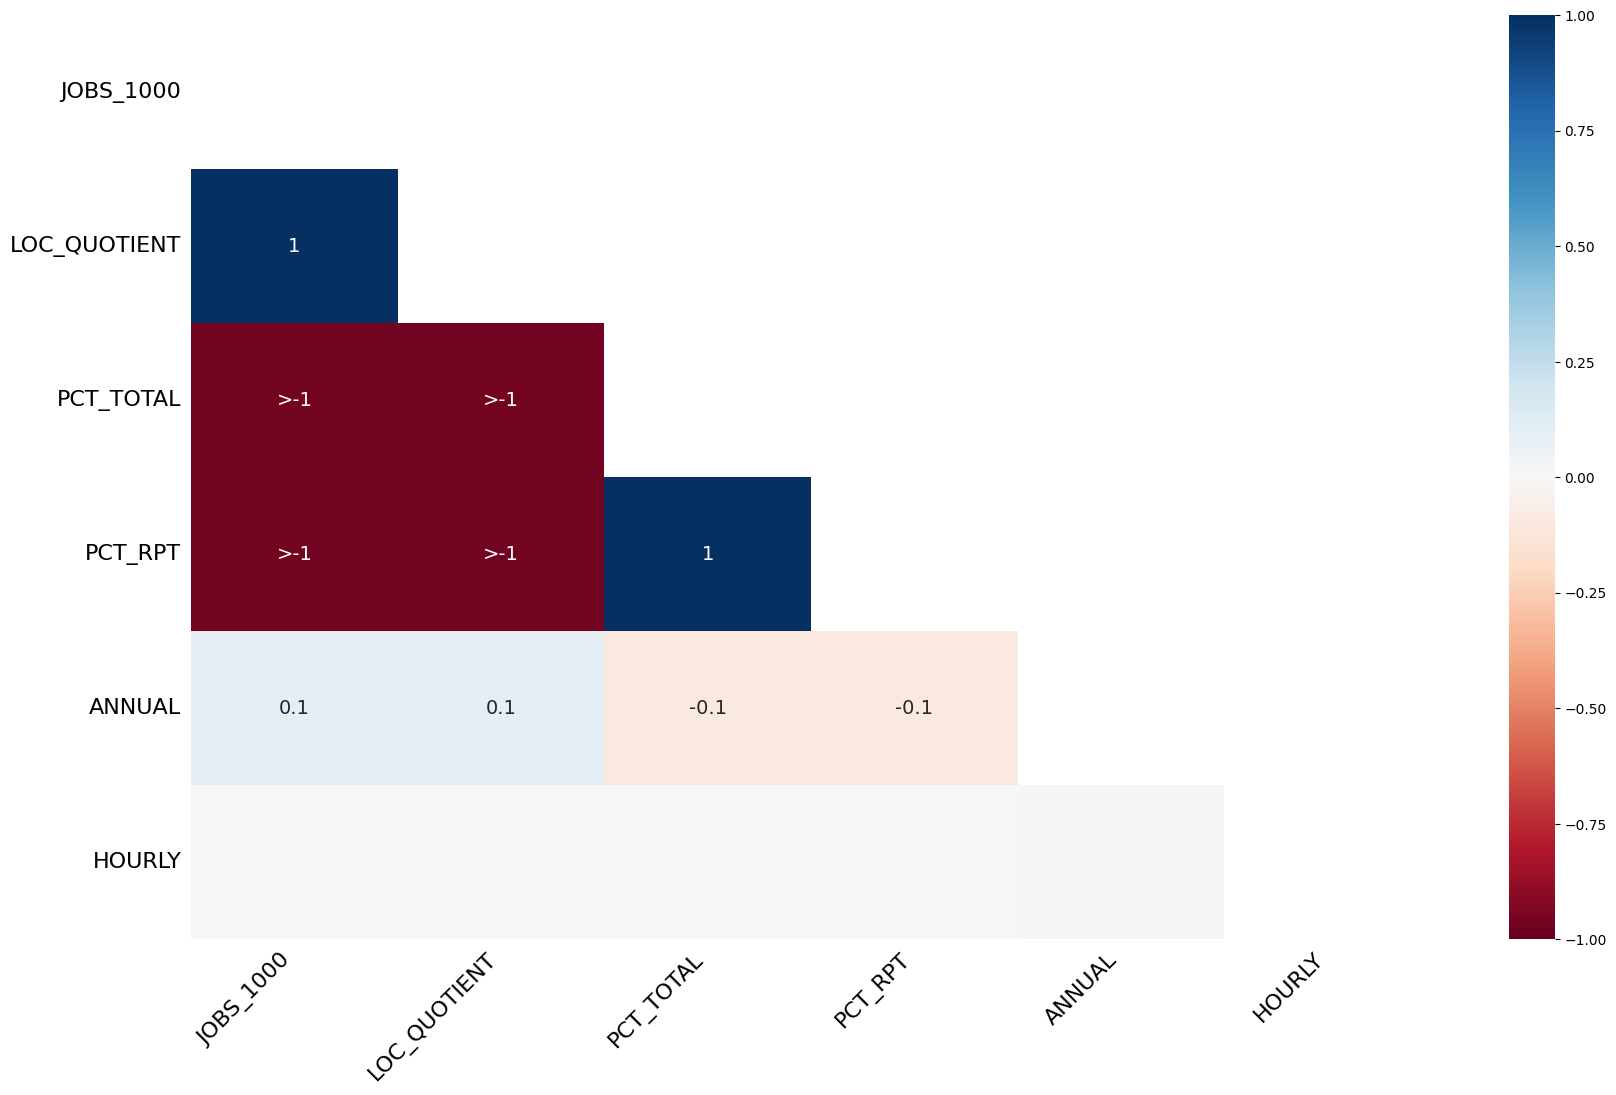


Descriptive statistics (numeric):
                AREA      AREA_TYPE       OWN_CODE
count  4.095170e+05  409517.000000  409517.000000
mean   3.780587e+05       2.753002     711.518706
std    1.139376e+06       1.780975     602.683136
min    1.000000e+00       1.000000       1.000000
25%    9.900000e+01       1.000000       5.000000
50%    9.900000e+01       2.000000    1235.000000
75%    3.584000e+04       4.000000    1235.000000
max    7.800001e+06       6.000000    1235.000000

Descriptive statistics (object):
        AREA_TITLE PRIM_STATE   NAICS     NAICS_TITLE         I_GROUP OCC_CODE  \
count      409517     409517  409517          409517          409517   409517   
unique        572         54     414             394               9     1396   
top          U.S.         US  000000  Cross-industry  cross-industry  13-1020   
freq       177824     177824  233096          233096          233096     1397   

                              OCC_TITLE   O_GROUP  TOT_EMP EMP_PRSE  ... 

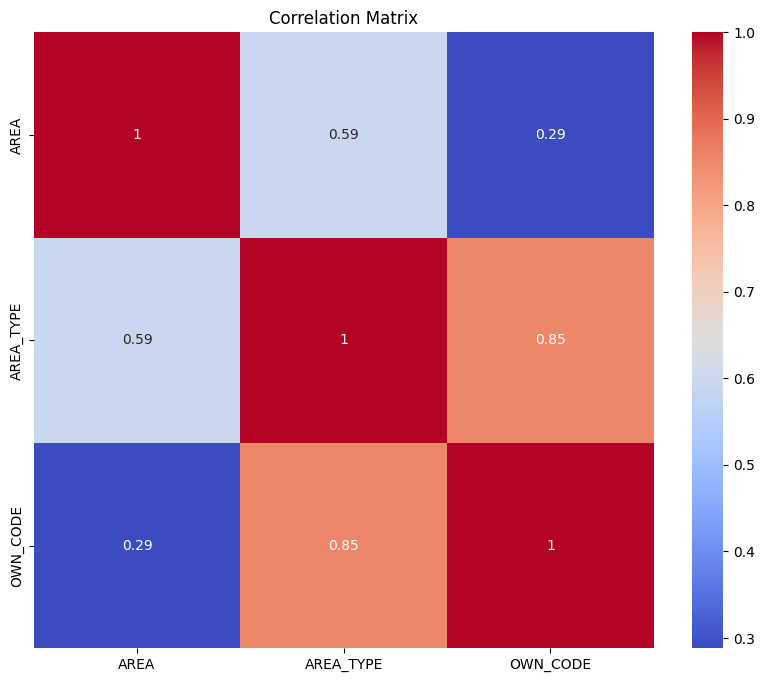

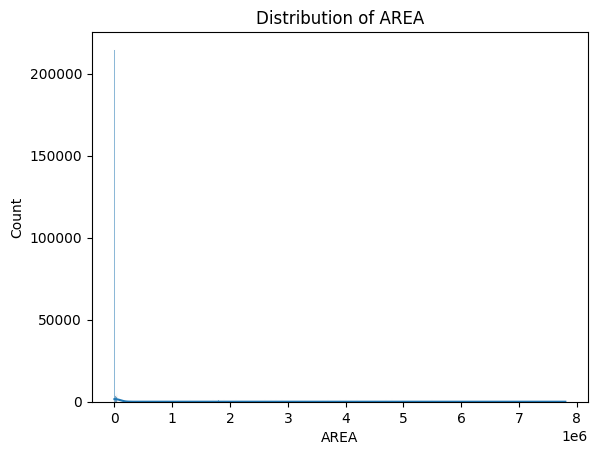

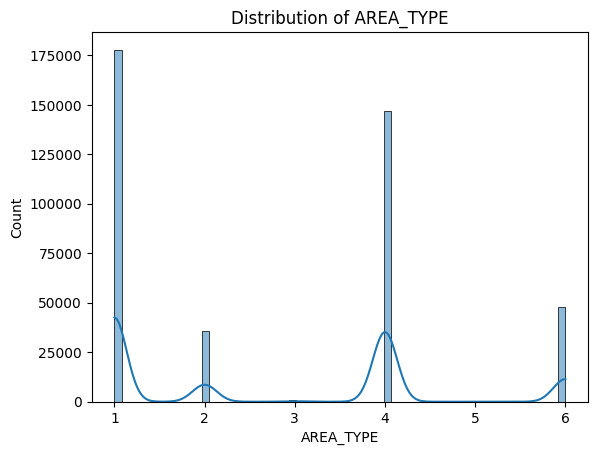

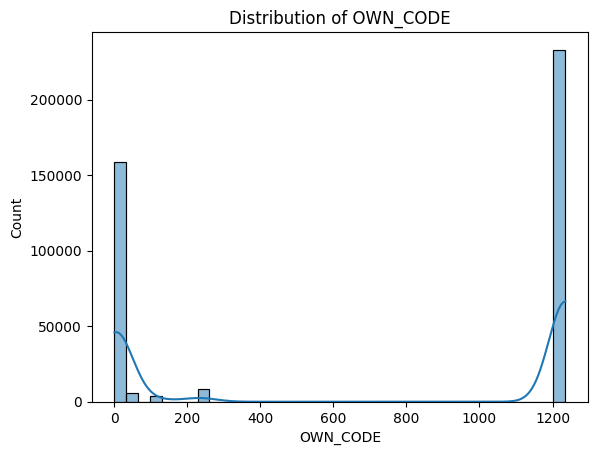

In [ ]:
# Extensive EDA for /workspaces/labor-force/oesem_may24_data/all_data_M_2024.xlsx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 1. Load the data
file_path = '/workspaces/labor-force/oesem_may24_data/all_data_M_2024.xlsx'
df = pd.read_excel(file_path)

# 2. Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 3. Missing values
print("\nMissing values per column:\n", df.isnull().sum())
msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()

# 4. Descriptive statistics
print("\nDescriptive statistics (numeric):\n", df.describe())
print("\nDescriptive statistics (object):\n", df.describe(include='object'))

# 5. Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 6. Value counts for categorical columns (top 5)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts().head())

# 7. Correlation matrix (numeric)
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    print("\nCorrelation matrix:\n", corr)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# 8. Distribution plots for numeric columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 9. Boxplots for numeric columns (outlier detection)
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 10. Pairplot for first few numeric columns (if not too many)
if len(num_cols) > 1 and len(num_cols) <= 10:
    sns.pairplot(df[num_cols].dropna())
    plt.show()

# 11. Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 12. Save cleaned sample for further analysis
df.sample(100).to_csv('eda_sample.csv', index=False)
print("\nSample saved as eda_sample.csv")

# 13. Summary
print("\nEDA complete. Review the above outputs and plots for insights.")